In [102]:
### Import necessary python packages

# math package
import numpy as np

# plotting packages
import matplotlib as mpl
from matplotlib import pyplot as plt

# input files reading package 
import json

# data container package
import pandas as pd


# get the time
from datetime import datetime
import time

import emcee

from matplotlib.lines import Line2D

In [2]:

# Lire les valeurs depuis le fichier Emcee_values_Dm2.txt
emcee_values = np.loadtxt('Emcee_values_Dm2.txt')

# Lire les valeurs depuis le fichier MH_values_Dm2.txt
mh_values = np.loadtxt('HS_values_Dm2.txt')

# Lire les valeurs depuis le fichier Emcee_values_Dm2.txt
theta_Emcee_values = np.loadtxt('Emcee_values_theta.txt')

# Lire les valeurs depuis le fichier MH_values_Dm2.txt
theta_mh_values = np.loadtxt('HS_values_theta.txt')


In [12]:
bins_dm2=np.arange(0,0.01,0.2e-5)
bins_theta=np.arange(0,np.pi/2,0.25e-2)

In [59]:
bins_dm2

array([0.000e+00, 2.000e-06, 4.000e-06, ..., 9.994e-03, 9.996e-03,
       9.998e-03])

In [53]:
# Création de l'histogramme pour obtenir les bins
counts, bin_edges = np.histogram(emcee_values, bins=bins_dm2)

# Calcul de la distribution cumulative
cdf = np.cumsum(counts)
cdf = cdf / cdf[-1]  # Normaliser la CDF

# Trouver les bords des bins correspondant aux percentiles souhaités
percentile_95 = bin_edges[np.searchsorted(cdf, 0.95)]
percentile_5 = bin_edges[np.searchsorted(cdf, 0.05)]

In [93]:
counts, bin_edges = np.histogram(emcee_values, bins=bins_dm2)
counts_mh, bin_edges_mh = np.histogram(mh_values, bins=bins_dm2)

# Calcul de la distribution cumulative
cdf = np.cumsum(counts)
cdf = cdf / cdf[-1]  # Normaliser la CDF
# Calcul de la distribution cumulative
cdf_mh = np.cumsum(counts_mh)
cdf_mh = cdf_mh / cdf_mh[-1]  # Normaliser la CDF

counts_theta, bin_edges_theta = np.histogram(theta_Emcee_values, bins=bins_theta)
counts_theta_mh, bin_edges_theta_mh = np.histogram(theta_mh_values, bins=bins_theta)

cdf_t = np.cumsum(counts_theta)
cdf_t = cdf_t / cdf_t[-1]  # Normaliser la CDF

cdf_tmh = np.cumsum(counts_theta_mh)
cdf_tmh = cdf_tmh / cdf_tmh[-1]  # Normaliser la CDF


In [94]:
upper_quantile_95 = bin_edges[np.searchsorted(cdf, 0.95)]
lower_quantile_5 = bin_edges[np.searchsorted(cdf, 0.05)]
lower_quantile_15 = bin_edges[np.searchsorted(cdf, 0.1585)]
upper_quantile_84 = bin_edges[np.searchsorted(cdf, 0.8415)]

upper_quantile_mh95 = bin_edges_mh[np.searchsorted(cdf_mh, 0.95)]
lower_quantile_mh5 = bin_edges_mh[np.searchsorted(cdf_mh, 0.05)]
lower_quantile_mh15 = bin_edges_mh[np.searchsorted(cdf_mh, 0.1585)]
upper_quantile_mh84 = bin_edges_mh[np.searchsorted(cdf_mh, 0.8415)]

lower_quantile_5_t = bin_edges_theta[np.searchsorted(cdf_t, 0.05)]
upper_quantile_95_t = bin_edges_theta[np.searchsorted(cdf_t, 0.95)]
lower_quantile_15_t = bin_edges_theta[np.searchsorted(cdf_t, 0.1585)]
upper_quantile_84_t = bin_edges_theta[np.searchsorted(cdf_t, 0.8415)]

lower_quantile_5_tmh = bin_edges_theta_mh[np.searchsorted(cdf_tmh, 0.05)]
upper_quantile_95_tmh = bin_edges_theta_mh[np.searchsorted(cdf_tmh, 0.95)]
lower_quantile_15_tmh = bin_edges_theta_mh[np.searchsorted(cdf_tmh, 0.1585)]
upper_quantile_84_tmh = bin_edges_theta_mh[np.searchsorted(cdf_tmh, 0.8415)]

In [58]:
print(upper_quantile_95)

0.002215408793801241


In [23]:
len(bin_edges)

50000

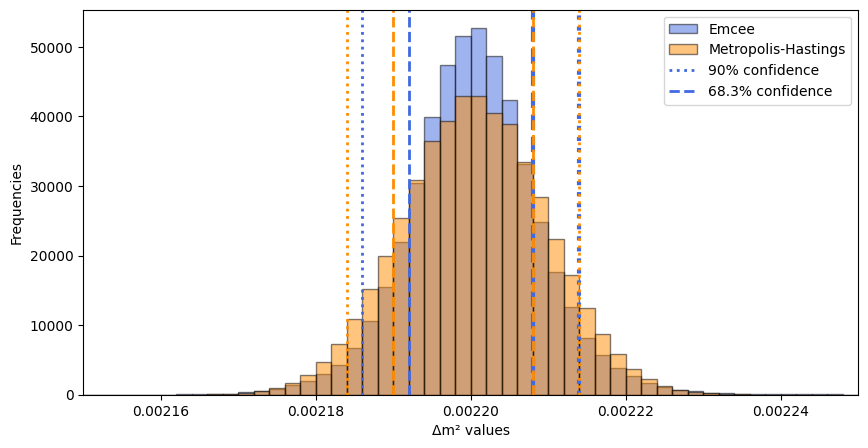

In [120]:
# Tracer les histogrammes
plt.figure(figsize=(10, 5))

# Histogramme pour Emcee_values_Dm2.txt
plt.hist(emcee_values, bins=bins_dm2, alpha=0.5, label='Emcee', edgecolor='black', color='royalblue',density=True)

# Histogramme pour MH_values_Dm2.txt
plt.hist(mh_values, bins=bins_dm2, alpha=0.5, label='Metropolis-Hastings', edgecolor='black',color='darkorange', density=True)
plt.axvline(lower_quantile_5, color='royalblue', linestyle=':', linewidth=2, label='90% confidence')
plt.axvline(upper_quantile_95, color='royalblue', linestyle=':', linewidth=3)
plt.axvline(lower_quantile_15, color='royalblue', linestyle='--', linewidth=2, label='68.3% confidence')
plt.axvline(upper_quantile_84, color='royalblue', linestyle='--', linewidth=3)

plt.axvline(lower_quantile_mh5, color='darkorange', linestyle=':', linewidth=2)
plt.axvline(upper_quantile_mh95, color='darkorange', linestyle=':', linewidth=2)
plt.axvline(lower_quantile_mh15, color='darkorange', linestyle='--', linewidth=2)
plt.axvline(upper_quantile_mh84, color='darkorange', linestyle='--', linewidth=2)



# Ajouter des titres et des étiquettes

plt.xlabel('Δm² values')
plt.ylabel('Frequencies')
plt.legend()

plt.xlim([0.00215, 0.00225])
# Afficher le graphique
#plt.savefig('Comparaison_Dm2.png')
plt.show()




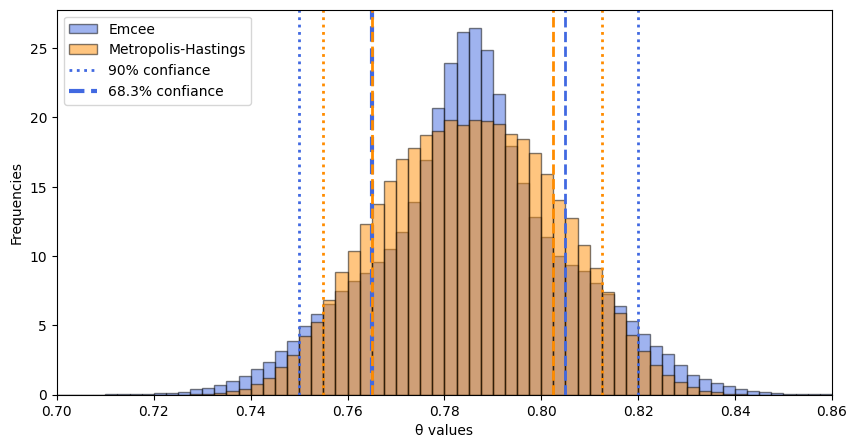

In [121]:
# Tracer les histogrammes
plt.figure(figsize=(10, 5))

# Histogramme pour Emcee_values_Dm2.txt
plt.hist(theta_Emcee_values, bins=bins_theta, alpha=0.5, label='Emcee', edgecolor='black',color='royalblue', density=True)

# Histogramme pour MH_values_Dm2.txt
plt.hist(theta_mh_values, bins=bins_theta, alpha=0.5, label='Metropolis-Hastings', edgecolor='black',color='darkorange', density=True)
plt.axvline(lower_quantile_5_t, color='royalblue', linestyle=':', linewidth=2, label='90% confiance')
plt.axvline(upper_quantile_95_t, color='royalblue', linestyle=':', linewidth=2)
plt.axvline(lower_quantile_15_t, color='royalblue', linestyle='--', linewidth=3, label='68.3% confiance')
plt.axvline(upper_quantile_84_t, color='royalblue', linestyle='--', linewidth=2)

plt.axvline(lower_quantile_5_tmh, color='darkorange', linestyle=':', linewidth=2)
plt.axvline(upper_quantile_95_tmh, color='darkorange', linestyle=':', linewidth=2)
plt.axvline(lower_quantile_15_tmh, color='darkorange', linestyle='--', linewidth=2)
plt.axvline(upper_quantile_84_tmh, color='darkorange', linestyle='--', linewidth=2)


# Ajouter des titres et des étiquettes

plt.xlabel('θ values')
plt.ylabel('Frequencies')
plt.legend()

plt.xlim([0.7, 0.86])
# Afficher le graphique
#plt.savefig('Comparaison_theta.png')
plt.show()